<a href="https://colab.research.google.com/github/Sharzla/UniProjects/blob/main/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
tweets = pd.read_csv("vaccine_tweets.csv")
tweets.head()

,Unnamed: 0,tweet_dt,topic,id,username,name,tweet,like_count,reply_count,retweet_count,retweeted
0,0,2021-01-29,Covid vaccine,1355056373067894784,stokel,Chris Stokel-Walker,"Cool cool, so vaccine supplies were diverted f...",0,0,0,False
1,1,2021-01-29,Covid vaccine,1355056371125907460,SandraWeeden,Sandra Weeden,"Please, stop using the term ‘the Covid vaccine...",0,0,0,False
2,2,2021-01-29,Covid vaccine,1355056324900487169,sunilupendra,Sunil Prasad,Mullahs and religious fundamentalists in Pakis...,0,0,0,False
3,3,2021-01-29,Covid vaccine,1355056300783263745,TheSunTech,The Sun Tech,Beware this Covid-19 vaccine NHS email scam th...,0,0,0,False
4,4,2021-01-29,Covid vaccine,1355056293095108608,OpsMediaWatch,Surviving LockDown: Back in ZombieLand,Merck abandons 2 potential COVID-19 vaccines o...,0,0,0,False


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#function to remove stop words
def remove_stopwords(text):
  tokenz = word_tokenize(text)
  stop_words = ['a', 'and', 'are', 'as', 'be','for', 'have',
                      'in', 'is', 'of', 'or', 'that','the', 'to', 'was', 'so']
    
  text_noSW = list()

  for i in range(0,len(tokenz)):

        if tokenz[i].lower() in stop_words:   # remember to make lower! 
            pass
        else:
            text_noSW.append(tokenz[i])

  return " ".join(text_noSW)

In [ ]:
#create a function to clean tweets
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt) # Remove mentions
    txt = re.sub(r'#', '', txt) # Remove hashtags
    txt = re.sub(r'RT : ', '', txt) # Remove retweets
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt) # Remove urls
    txt = txt.replace('\n','')
    txt = remove_stopwords(txt)
    return txt

In [ ]:
tweets['tweet'] = tweets['tweet'].apply(cleanUpTweet)
tweets.head()

,Unnamed: 0,tweet_dt,topic,id,username,name,tweet,like_count,reply_count,retweet_count,retweeted
0,0,2021-01-29,Covid vaccine,1355056373067894784,stokel,Chris Stokel-Walker,"Cool cool , vaccine supplies were diverted fro...",0,0,0,False
1,1,2021-01-29,Covid vaccine,1355056371125907460,SandraWeeden,Sandra Weeden,"Please , stop using term ‘ Covid vaccine ’ . T...",0,0,0,False
2,2,2021-01-29,Covid vaccine,1355056324900487169,sunilupendra,Sunil Prasad,Mullahs religious fundamentalists Pakistan tod...,0,0,0,False
3,3,2021-01-29,Covid vaccine,1355056300783263745,TheSunTech,The Sun Tech,Beware this Covid-19 vaccine NHS email scam ex...,0,0,0,False
4,4,2021-01-29,Covid vaccine,1355056293095108608,OpsMediaWatch,Surviving LockDown: Back in ZombieLand,Merck abandons 2 potential COVID-19 vaccines o...,0,0,0,False


In [ ]:
df_tw = pd.DataFrame(tweets.iloc[:, 6])
df_tw.head(2)

,tweet
0,"Cool cool , vaccine supplies were diverted fro..."
1,"Please , stop using term ‘ Covid vaccine ’ . T..."


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df_tw['scores'] = df_tw['tweet'].apply(lambda review: sid.polarity_scores(review))

df_tw.head()

,tweet,scores
0,"Cool cool , vaccine supplies were diverted fro...","{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp..."
1,"Please , stop using term ‘ Covid vaccine ’ . T...","{'neg': 0.126, 'neu': 0.743, 'pos': 0.131, 'co..."
2,Mullahs religious fundamentalists Pakistan tod...,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp..."
3,Beware this Covid-19 vaccine NHS email scam ex...,"{'neg': 0.345, 'neu': 0.473, 'pos': 0.182, 'co..."
4,Merck abandons 2 potential COVID-19 vaccines o...,"{'neg': 0.426, 'neu': 0.574, 'pos': 0.0, 'comp..."


In [ ]:
df_tw['compound']  = df_tw['scores'].apply(lambda score_dict: score_dict['compound'])

df_tw.head()

,tweet,scores,compound
0,"Cool cool , vaccine supplies were diverted fro...","{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.7506
1,"Please , stop using term ‘ Covid vaccine ’ . T...","{'neg': 0.126, 'neu': 0.743, 'pos': 0.131, 'co...",0.0258
2,Mullahs religious fundamentalists Pakistan tod...,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.1027
3,Beware this Covid-19 vaccine NHS email scam ex...,"{'neg': 0.345, 'neu': 0.473, 'pos': 0.182, 'co...",-0.3400
4,Merck abandons 2 potential COVID-19 vaccines o...,"{'neg': 0.426, 'neu': 0.574, 'pos': 0.0, 'comp...",-0.6369


In [ ]:
df_tw['label'] = df_tw['compound'].apply(lambda c: 'pos' if c>0 else ('neu' if c==0 else 'neg'))

df_tw.head()

,tweet,scores,compound,label
0,"Cool cool , vaccine supplies were diverted fro...","{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.7506,pos
1,"Please , stop using term ‘ Covid vaccine ’ . T...","{'neg': 0.126, 'neu': 0.743, 'pos': 0.131, 'co...",0.0258,pos
2,Mullahs religious fundamentalists Pakistan tod...,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.1027,neg
3,Beware this Covid-19 vaccine NHS email scam ex...,"{'neg': 0.345, 'neu': 0.473, 'pos': 0.182, 'co...",-0.3400,neg
4,Merck abandons 2 potential COVID-19 vaccines o...,"{'neg': 0.426, 'neu': 0.574, 'pos': 0.0, 'comp...",-0.6369,neg


In [ ]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

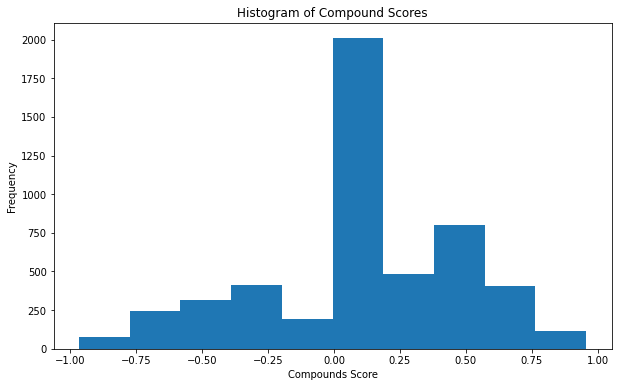

In [ ]:
df_tw['compound'].plot(kind='hist', figsize=(10,6))
plt.title('Histogram of Compound Scores') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Compounds Score') # add x-label

plt.show()

In [ ]:
def tweetlength(tweet):
  res = len(tweet.split())
  return str(res)

In [ ]:
df_tw['length'] = df_tw['tweet'].apply(tweetlength)
df_tw.head()

,tweet,scores,compound,label,length
0,"Cool cool , vaccine supplies were diverted fro...","{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.7506,pos,18
1,"Please , stop using term ‘ Covid vaccine ’ . T...","{'neg': 0.126, 'neu': 0.743, 'pos': 0.131, 'co...",0.0258,pos,22
2,Mullahs religious fundamentalists Pakistan tod...,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.1027,neg,13
3,Beware this Covid-19 vaccine NHS email scam ex...,"{'neg': 0.345, 'neu': 0.473, 'pos': 0.182, 'co...",-0.3400,neg,11
4,Merck abandons 2 potential COVID-19 vaccines o...,"{'neg': 0.426, 'neu': 0.574, 'pos': 0.0, 'comp...",-0.6369,neg,12


In [ ]:
df_tw['positive']  = df_tw['scores'].apply(lambda score_dict: score_dict['pos'])
df_tw['negative']  = df_tw['scores'].apply(lambda score_dict: score_dict['neg'])
df_tw.head()

,tweet,scores,compound,label,length,positive,negative
0,"Cool cool , vaccine supplies were diverted fro...","{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.7506,pos,18,0.346,0.000
1,"Please , stop using term ‘ Covid vaccine ’ . T...","{'neg': 0.126, 'neu': 0.743, 'pos': 0.131, 'co...",0.0258,pos,22,0.131,0.126
2,Mullahs religious fundamentalists Pakistan tod...,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.1027,neg,13,0.000,0.113
3,Beware this Covid-19 vaccine NHS email scam ex...,"{'neg': 0.345, 'neu': 0.473, 'pos': 0.182, 'co...",-0.3400,neg,11,0.182,0.345
4,Merck abandons 2 potential COVID-19 vaccines o...,"{'neg': 0.426, 'neu': 0.574, 'pos': 0.0, 'comp...",-0.6369,neg,12,0.000,0.426


In [ ]:
df_tw['length'] = pd.to_numeric(df_tw['length']) #converting column to numeric

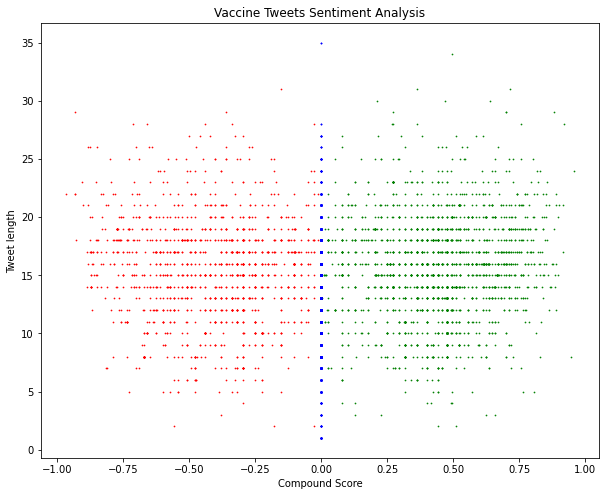

In [ ]:
plt.figure(figsize=(10,8))
for index, row in df_tw.iterrows():
    if row['label'] == 'pos':
        plt.scatter(row['compound'], row['length'], color="green", s=0.5)
    elif row['label'] == 'neg':
        plt.scatter(row['compound'], row['length'], color="red", s=0.5)
    elif row['label'] == 'neu':
        plt.scatter(row['compound'], row['length'], color="blue", s=0.5)

plt.title('Vaccine Tweets Sentiment Analysis')
plt.xlabel('Compound Score')
plt.ylabel('Tweet length')
# add legend
plt.show()

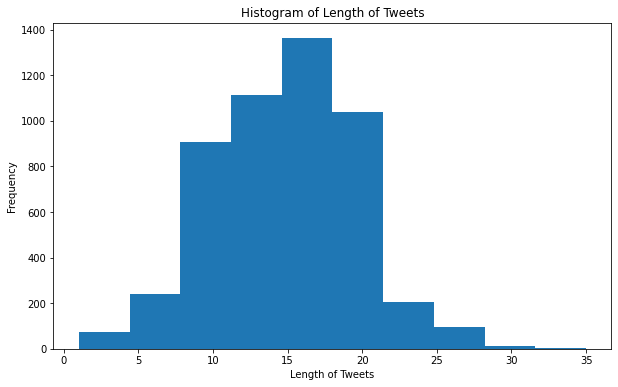

In [ ]:
df_tw['length'].plot(kind='hist', figsize=(10,6))
plt.title('Histogram of Length of Tweets') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Length of Tweets') # add x-label

plt.show()

In [ ]:
# WordCloud - Python library for creating image wordclouds
from wordcloud import WordCloud

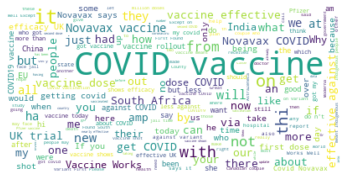

In [ ]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df_tw['tweet']])
stopwords='vaccine'
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(words)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<BarContainer object of 10 artists>

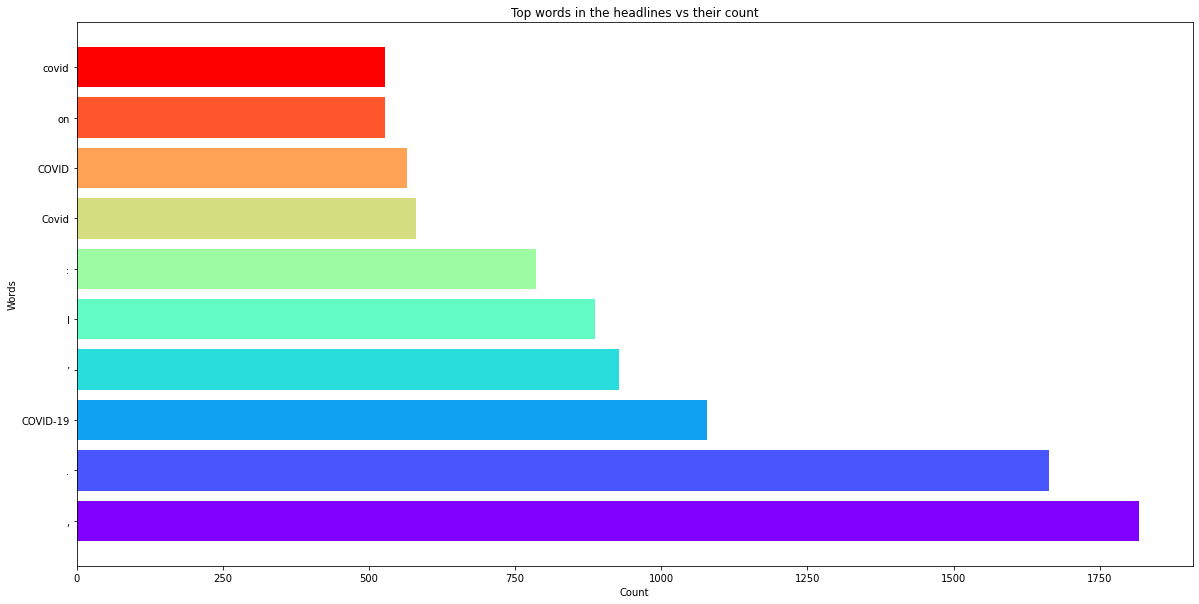

In [ ]:
import collections
from matplotlib import cm
from matplotlib import rcParams
filtered_words = [word for word in words.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words_1 = []
counts = []
for letter, count in counted_words.most_common(10):
    words_1.append(letter)
    counts.append(count)
  
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words_1, counts, color=colors)

In [ ]:
df_tw['label'].value_counts()

pos    2014
neu    1794
neg    1243
Name: label, dtype: int64

In [ ]:
#TEST TO MAKE THE OUTPUT BINARY
df_tw = df_tw[~df_tw['label'].str.contains('neu')]

In [ ]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

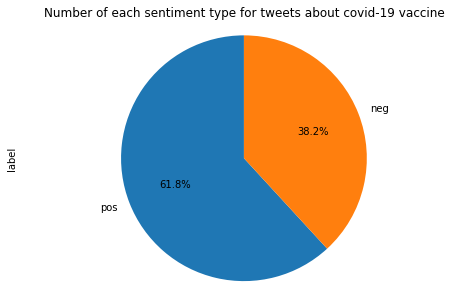

In [ ]:
df_tw['label'].value_counts().plot(kind='pie', figsize=(8, 5),autopct='%1.1f%%',
                            startangle=90)

plt.title('Number of each sentiment type for tweets about covid-19 vaccine') 
plt.axis('equal') 
plt.show()

# Machine Learning Sentiment Analysis: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
df_sent = pd.DataFrame(df_tw.iloc[:, [0,3]])
df_sent.head()

,tweet,label
0,"Cool cool , vaccine supplies were diverted fro...",pos
1,"Please , stop using term ‘ Covid vaccine ’ . T...",pos
2,Mullahs religious fundamentalists Pakistan tod...,neg
3,Beware this Covid-19 vaccine NHS email scam ex...,neg
4,Merck abandons 2 potential COVID-19 vaccines o...,neg


In [ ]:
# extract features
def extract_features(df,field,training_data,testing_data):
  cv= CountVectorizer(binary=True, max_df=0.95)
  cv.fit_transform(training_data[field].values)
  train_feature_set=cv.transform(training_data[field].values)
  test_feature_set=cv.transform(testing_data[field].values)
  return train_feature_set,test_feature_set,cv

In [ ]:
#create features
#field  - column name contains the review text
field = 'tweet'
# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data,testing_data = train_test_split(df_tw,random_state = 2000)
# GET FEATURES
X_train,X_test, feature_transformer=extract_features(df_tw,field,training_data,testing_data)
# GET LABELS
Y_train=training_data['label'].values
Y_test=testing_data['label'].values

In [ ]:
#importing classifier - svm
from sklearn.svm import SVC

#training the linear svm
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',max_iter=1000,random_state=42)

#fitting the svm for tfidf features
model_svm = svm.fit(X_train,Y_train)
svm_predicted = model_svm.predict(X_test)
print("SVM Accuracy with TFIDF:",metrics.accuracy_score(Y_test, svm_predicted))

SVM Accuracy with TFIDF: 0.8282208588957055


In [ ]:
from sklearn.linear_model import RidgeClassifier
rcl = RidgeClassifier(max_iter=1000, random_state=42)

model_rcl = rcl.fit(X_train, Y_train)
rcl_predicted = model_rcl.predict(X_test)

print("Ridge Classifier Accuracy:", metrics.accuracy_score(Y_test, rcl_predicted))

Ridge Classifier Accuracy: 0.8306748466257668


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
matrix = confusion_matrix(Y_test, svm_predicted)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[242  63]
 [ 77 433]]


In [ ]:
matrix2 = classification_report(Y_test, svm_predicted)
print('Classification report for SVM: \n',matrix2)

Classification report for SVM: 
               precision    recall  f1-score   support

         neg       0.76      0.79      0.78       305
         pos       0.87      0.85      0.86       510

    accuracy                           0.83       815
   macro avg       0.82      0.82      0.82       815
weighted avg       0.83      0.83      0.83       815



In [ ]:
matrix3 = classification_report(Y_test, rcl_predicted)
print('Classification report for RidgeClassifier: \n', matrix3)

Classification report for RidgeClassifier: 
               precision    recall  f1-score   support

         neg       0.78      0.76      0.77       305
         pos       0.86      0.87      0.87       510

    accuracy                           0.83       815
   macro avg       0.82      0.82      0.82       815
weighted avg       0.83      0.83      0.83       815



In [ ]:
df_tw.to_csv('CV19Vaccine.csv', index= False)